<a href="https://colab.research.google.com/github/DEVANSH-JINDAL/Machine-Learning/blob/master/Image_Reduction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
%cd /gdrive/My Drive/test

/gdrive/My Drive/test


In [ ]:
%ls

abc.jpg  image.bmp  noise.png  sher.jpg


In [ ]:
img=cv2.imread("sher.jpg")

In [ ]:
print(type(img))
print(img)

<class 'numpy.ndarray'>
[[[ 89  84  63]
  [ 83  80  59]
  [ 89  85  67]
  ...
  [ 30  33  24]
  [ 31  34  25]
  [ 32  35  26]]

 [[ 94  89  68]
  [ 92  86  67]
  [ 93  89  71]
  ...
  [ 31  34  25]
  [ 31  34  25]
  [ 31  34  25]]

 [[ 93  87  68]
  [ 95  89  70]
  [ 89  85  67]
  ...
  [ 30  33  24]
  [ 29  32  23]
  [ 27  30  21]]

 ...

 [[228 224 219]
  [221 217 212]
  [189 186 178]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[191 188 183]
  [173 170 165]
  [129 127 119]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[112 109 104]
  [105 102  97]
  [ 81  79  71]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


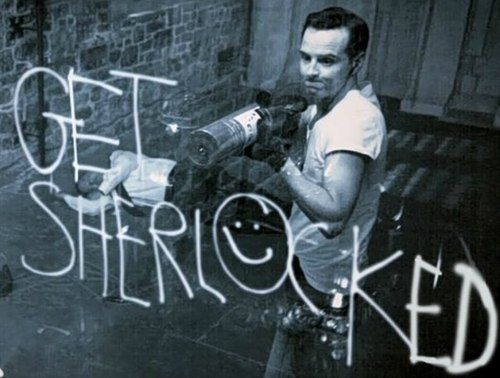

In [ ]:
cv2_imshow(img)

In [ ]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

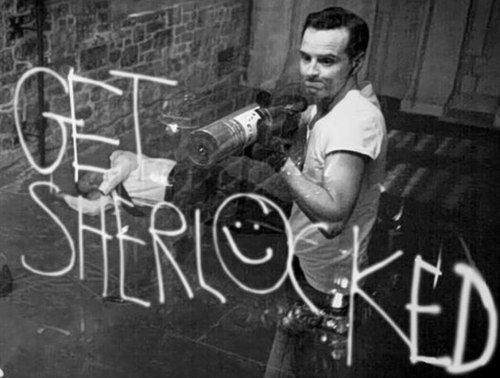

In [ ]:
cv2_imshow(im)

In [ ]:
print(im)

[[ 78  74  80 ...  30  31  32]
 [ 83  81  84 ...  31  31  31]
 [ 82  84  80 ...  30  29  27]
 ...
 [223 216 184 ...   0   0   0]
 [187 169 125 ...   0   0   0]
 [108 101  77 ...   0   0   0]]


In [ ]:
HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

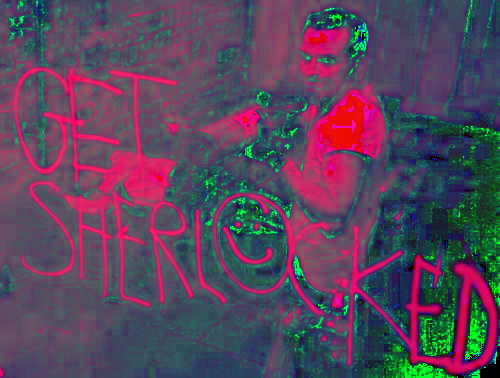

In [ ]:
cv2_imshow(HSV)

In [ ]:
print(HSV)

[[[ 96  74  89]
  [ 94  74  83]
  [ 95  63  89]
  ...
  [ 80  70  33]
  [ 80  68  34]
  [ 80  66  35]]

 [[ 96  71  94]
  [ 97  69  92]
  [ 95  60  93]
  ...
  [ 80  68  34]
  [ 80  68  34]
  [ 80  68  34]]

 [[ 97  69  93]
  [ 97  67  95]
  [ 95  63  89]
  ...
  [ 80  70  33]
  [ 80  72  32]
  [ 80  77  30]]

 ...

 [[103  10 228]
  [103  10 221]
  [ 98  15 189]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[101  11 191]
  [101  12 173]
  [ 96  20 129]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[101  18 112]
  [101  19 105]
  [ 96  31  81]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
image2=cv2.imread("noised.jpg")
image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(image2,1,400)

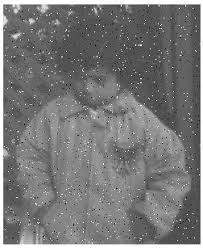

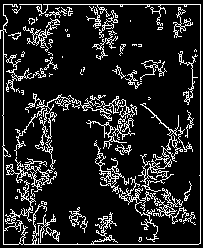

In [ ]:
cv2_imshow(image2)
cv2_imshow(edge)

In [ ]:
kernal= np.ones((3,3),np.float32)/9
filt=cv2.filter2D(image2, -1, kernal)

			ORIGINAL


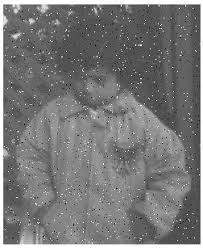


			DENOISED


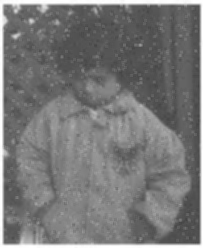

In [ ]:
print("\t\t\tORIGINAL")
cv2_imshow(image2)
print("\n\t\t\tDENOISED")
cv2_imshow(filt)


In [ ]:
blur=cv2.blur(image2,(3,3))
gblur=cv2.GaussianBlur(image2,(3,3),0)

			Mean FILTER


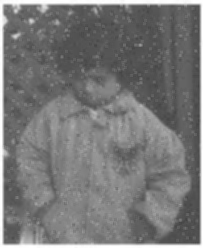


			Gaussian FILTER


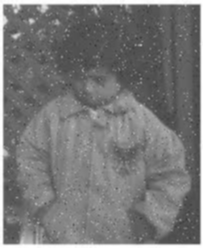

In [ ]:
print("\t\t\tMean FILTER")
cv2_imshow(blur)
print("\n\t\t\tGaussian FILTER")
cv2_imshow(gblur)

In [105]:
def noise_filt(imag, filter):
  new_img = imag.copy()
  patch = filter // 2
  temp = []
  nrow, ncol = imag.shape
  for i in range(nrow):
    for j in range(ncol):
      for k in range(i-patch, i+patch+1):
        for l in range(j-patch, j+patch+1):
          if (k>=0) and (k<nrow):
            if (l>=0) and (l<ncol):
              temp.append(imag[k,l])
      temp.remove(imag[i,j])
      maxv=max(temp)
      minv=min(temp)
      if imag[i,j]>maxv:
        new_img[i,j]=maxv
      elif imag[i,j]<minv:
        new_img[i,j]=minv
      temp=[]
  return new_img

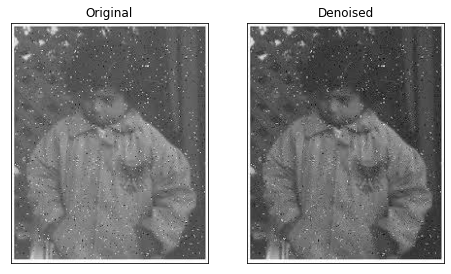

In [115]:
new_image = noise_filt(image3,5)
plt.figure(figsize=(12,7))
plt.subplot(131), plt.imshow(image2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Denoised')
plt.xticks([]), plt.yticks([])
plt.show()